In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# DATA LOADING

In [5]:
data=pd.read_csv("F:/thesis\Mental-Health-Prediction-using-Machine-Learning-Algorithms-main\Mental-Health-Prediction-using-Machine-Learning-Algorithms-main\survey.csv")

# DATA EXPLORATION

In [6]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [8]:
data.shape

(1259, 27)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<AxesSubplot: >

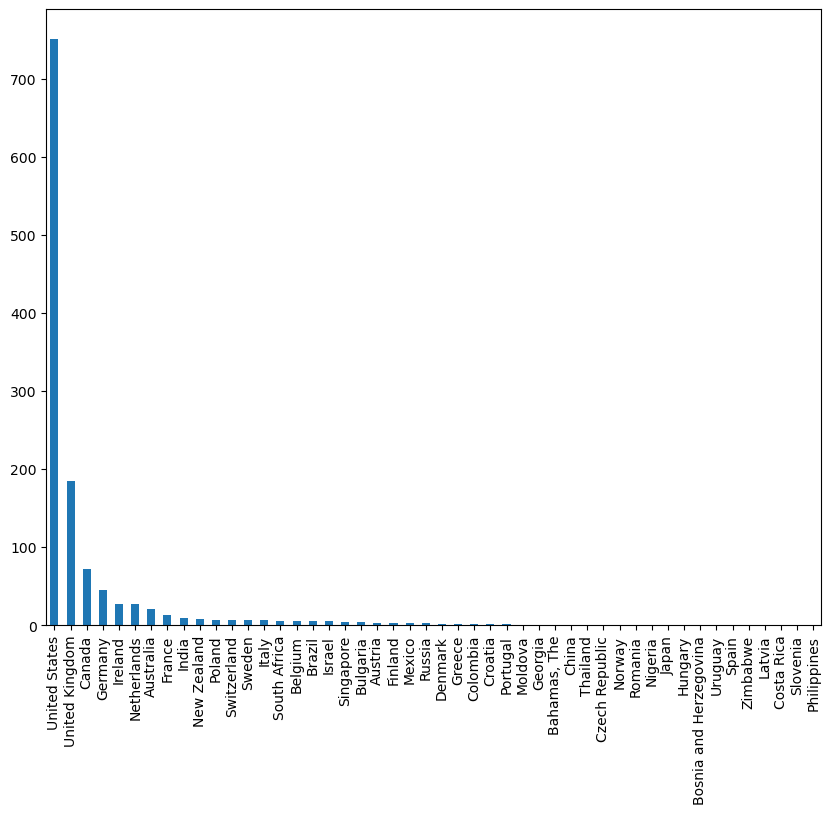

In [10]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [11]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [12]:
data.drop(['Country','state','Timestamp','comments'], axis=1,inplace=True)

In [13]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [14]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [15]:
data['self_employed'].fillna('No',inplace=True)

In [16]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

# HANDLED MISSING VALUES, DATA CLEANING, TRANSFORMATION

In [17]:
data['work_interfere'].fillna('N/A',inplace=True)

In [18]:
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

<AxesSubplot: >

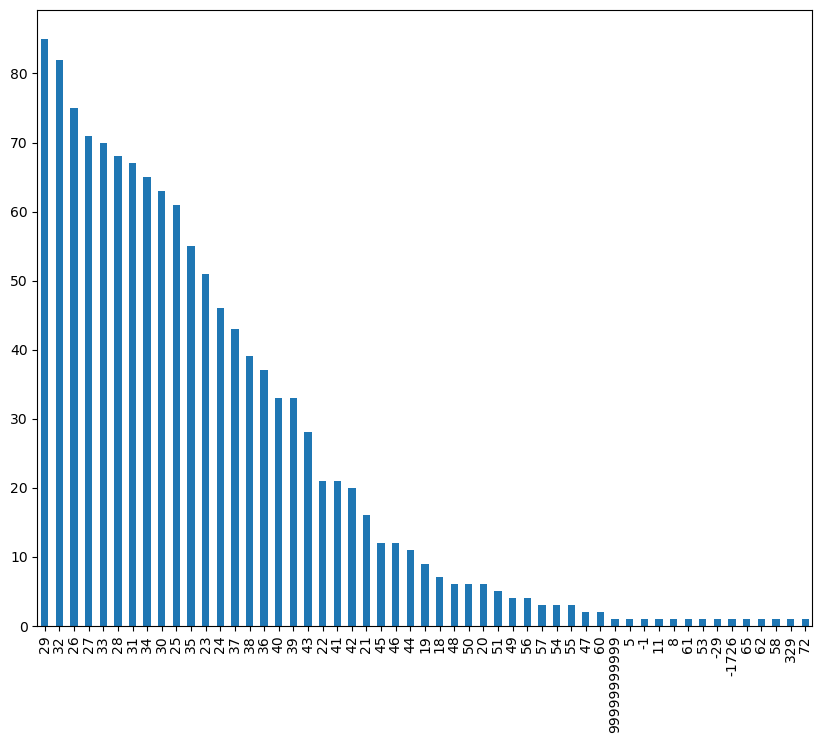

In [19]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [20]:
data.drop(data[(data['Age']>60)|(data['Age']<18)].index,inplace=True)

<AxesSubplot: >

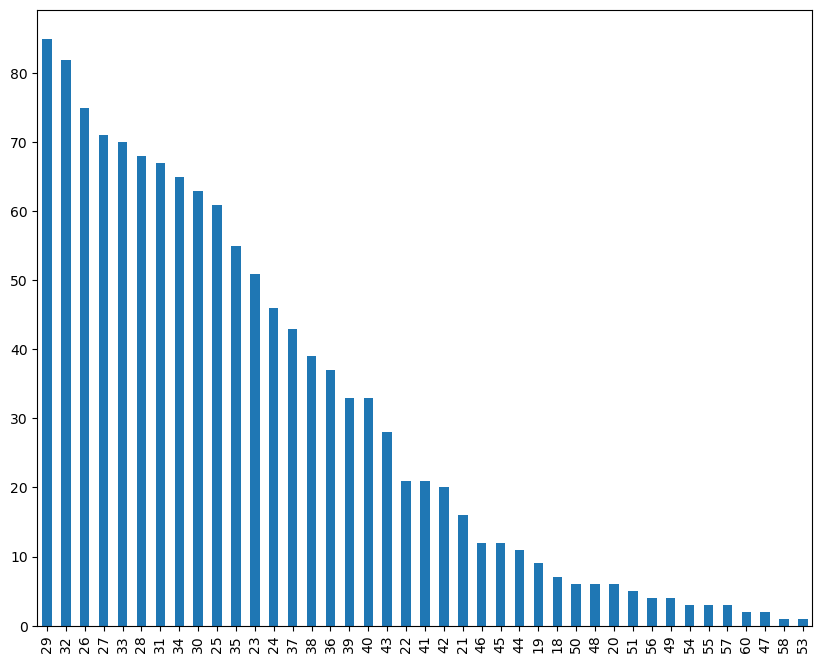

In [21]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

<AxesSubplot: >

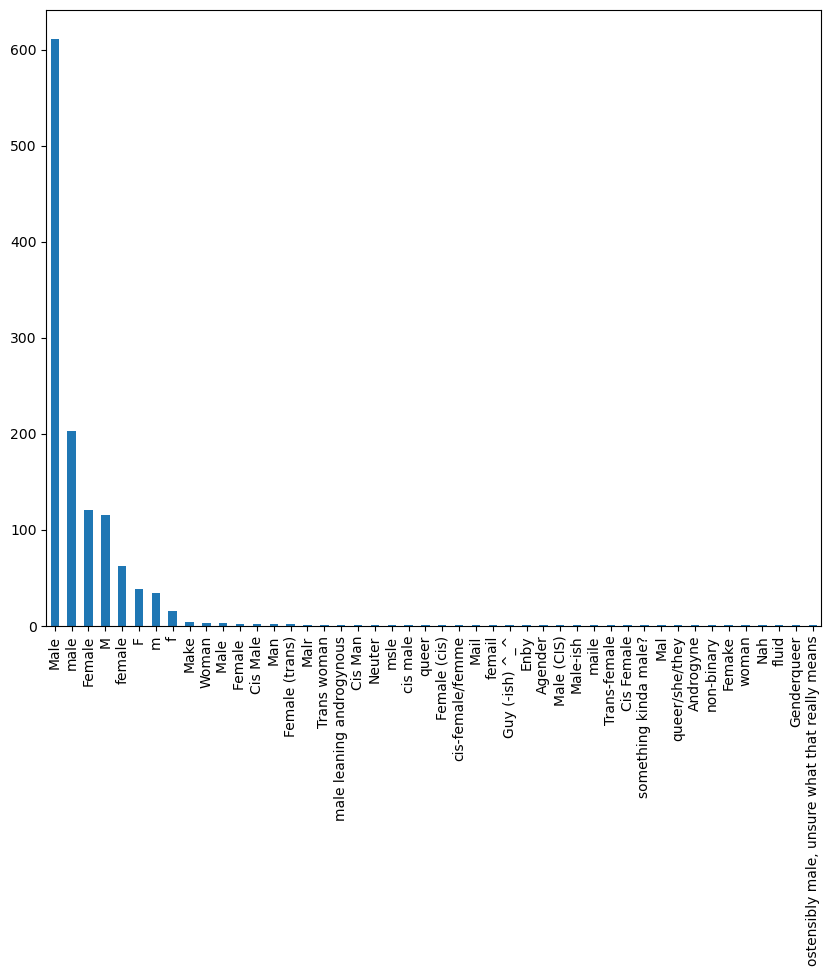

In [22]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [23]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male','Mail','Male-ish', 'Male (CIS)','Cis Man','male leaning androgynous', 'msle','Malr','Mal','maile','Guy (-ish) ^_^', 'Make',], 'Male', inplace = True)

data[ 'Gender']. replace([ 'Female ','female','f','F','femail','Woman', 'Female','Cis Female','cis-female/femme','Femake', 'Female (cis)','woman', ], 'Female', inplace=True)

data['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Agender', 'Androgyne', 'ostensibly male, unsure what that really means','Trans-female', 'male learning androgynous', 'A little about you', 'Nah', 'All', 'ostensibly male', 'unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guyish', 'Trans woman'], 'Non-Binary', inplace=True)

# DATA VISUALIZATION

<AxesSubplot: >

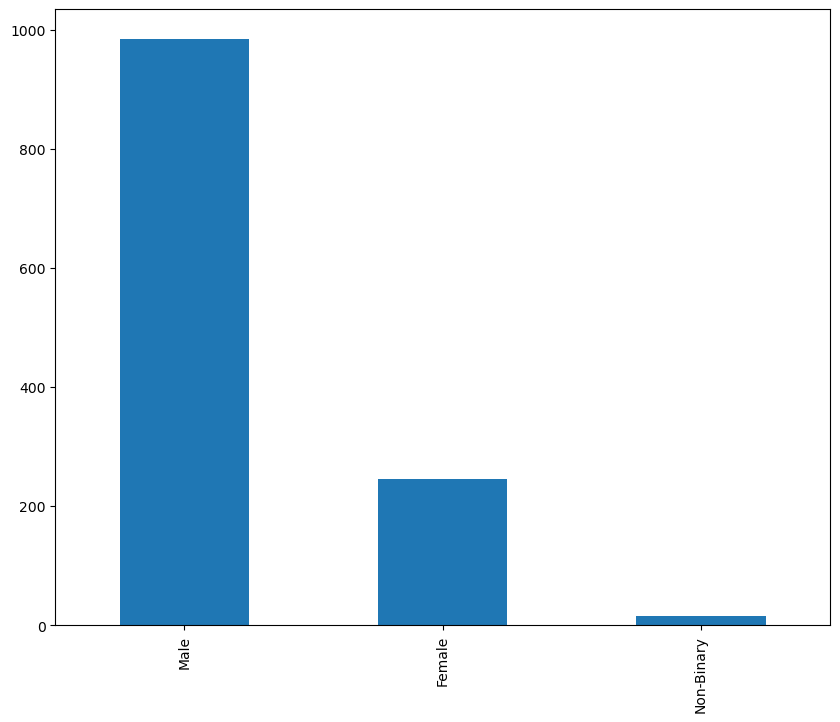

In [24]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

C:\Users\USER\AppData\Local\Temp\ipykernel_15268\665254341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

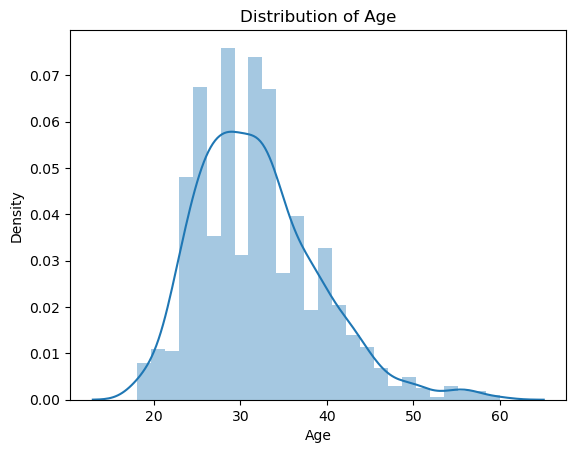

In [25]:
sb.distplot(data["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")

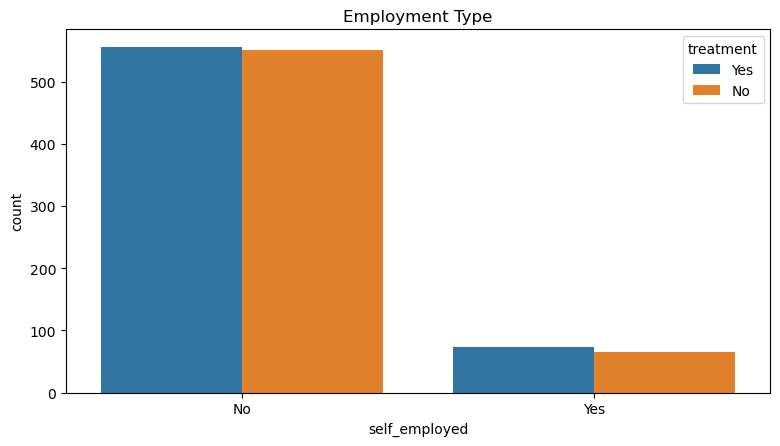

In [26]:
plt.figure(figsize=(20, 50))
plt.subplot(9, 2, 1)
sb.countplot(x='self_employed', hue='treatment', data=data)
plt.title('Employment Type')
plt.show()

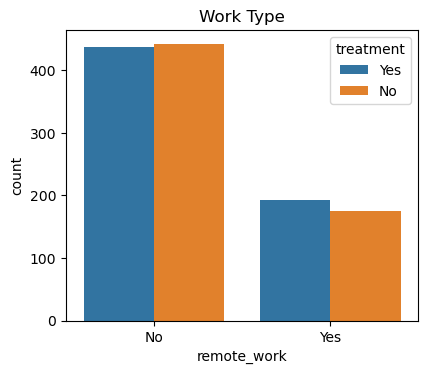

In [27]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 4)
sb.countplot(x='remote_work', hue='treatment', data=data)
plt.title('Work Type')
plt.show()

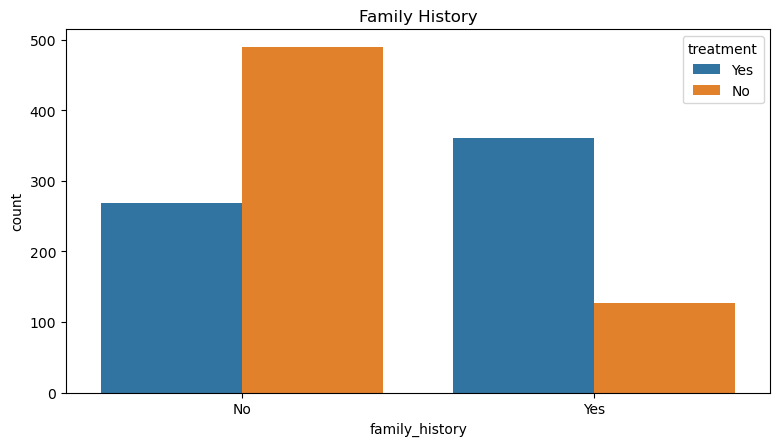

In [28]:
plt.figure(figsize=(20, 50))
plt.subplot(9, 2, 2)
sb.countplot(x='family_history', hue='treatment', data=data)
plt.title('Family History')
plt.show()

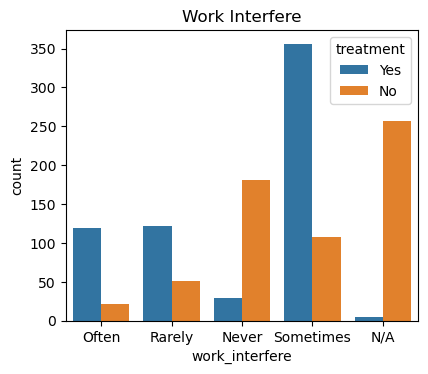

In [29]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 3)
sb.countplot(x='work_interfere', hue='treatment', data=data)
plt.title('Work Interfere')
plt.show()

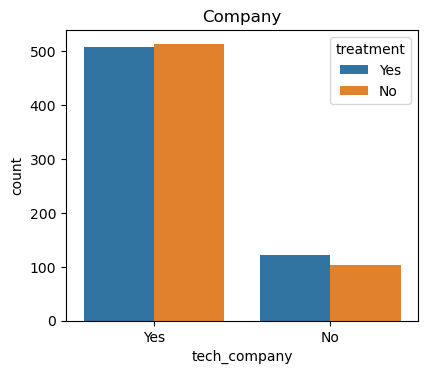

In [30]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 5)
sb.countplot(x='tech_company', hue='treatment', data=data)
plt.title('Company')
plt.show()

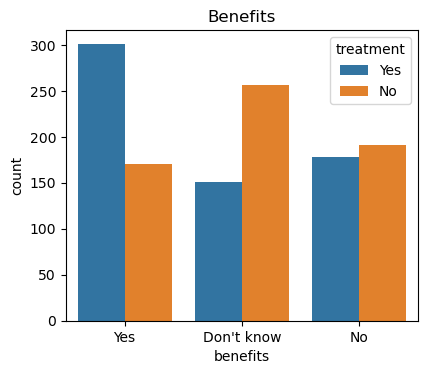

In [31]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 6)
sb.countplot(x='benefits', hue='treatment', data=data)
plt.title('Benefits')
plt.show()

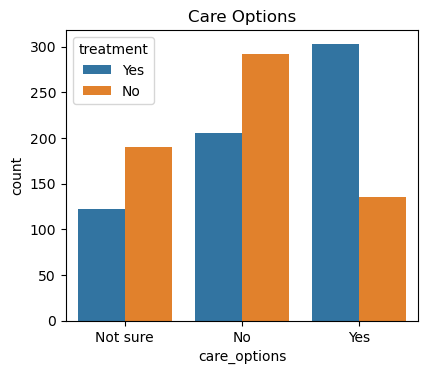

In [32]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 7)
sb.countplot(x='care_options', hue='treatment', data=data)
plt.title('Care Options')
plt.show()

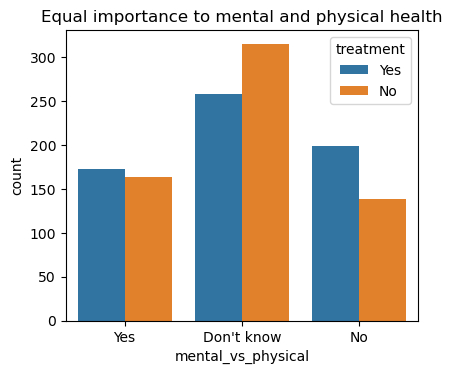

In [33]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 8)
sb.countplot(x='mental_vs_physical', hue='treatment', data=data)
plt.title('Equal importance to mental and physical health')
plt.show()

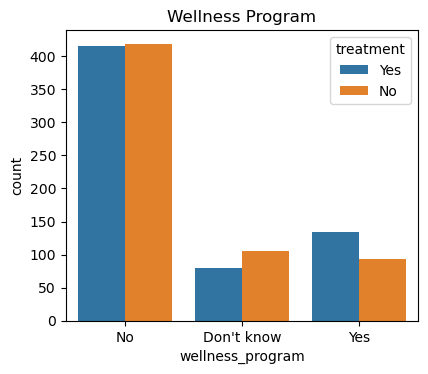

In [34]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 9)
sb.countplot(x='wellness_program', hue='treatment', data=data)
plt.title('Wellness Program')
plt.show()

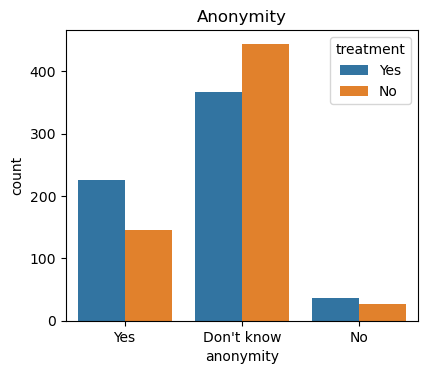

In [35]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 10)
sb.countplot(x='anonymity', hue='treatment', data=data)
plt.title('Anonymity')
plt.show()

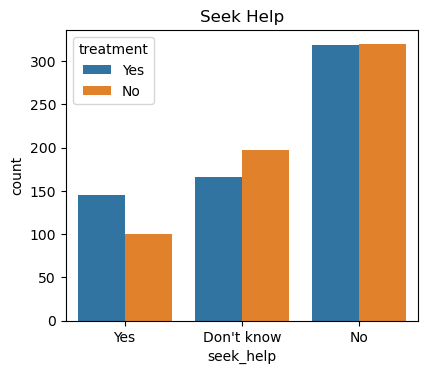

In [45]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 11)
sb.countplot(x='seek_help', hue='treatment', data=data)
plt.title('Seek Help')

plt.show()

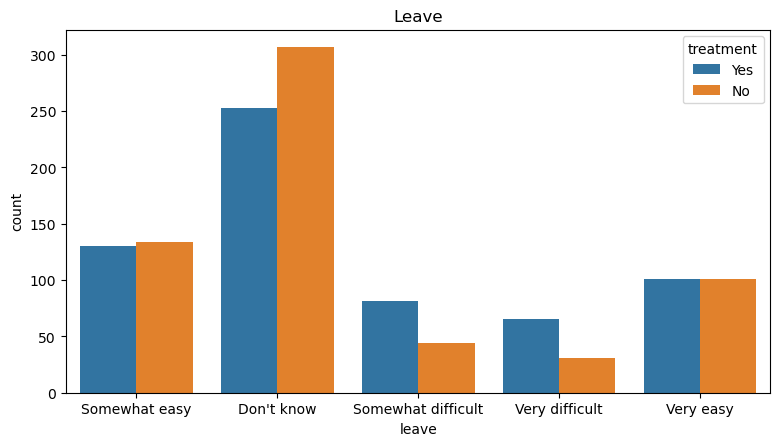

In [36]:
plt.figure(figsize=(20, 50))
plt.subplot(9, 2, 11)
sb.countplot(x='leave', hue='treatment', data=data)
plt.title('Leave')
plt.show()

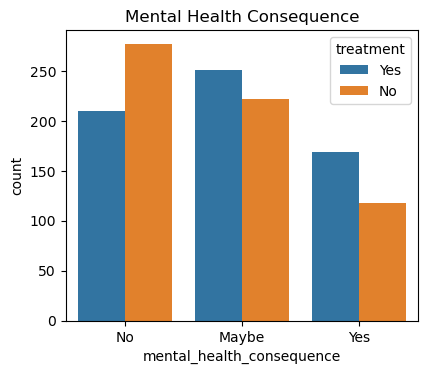

In [37]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 12)
sb.countplot(x='mental_health_consequence', hue='treatment', data=data)
plt.title('Mental Health Consequence')
plt.show()

Text(0.5, 1.0, 'Physical health Consequence')

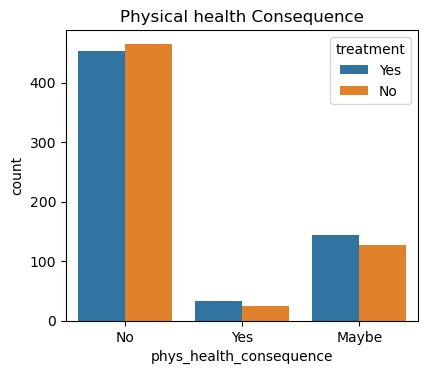

In [38]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 13)
sb.countplot(x='phys_health_consequence', hue='treatment', data=data)
plt.title('Physical health Consequence')

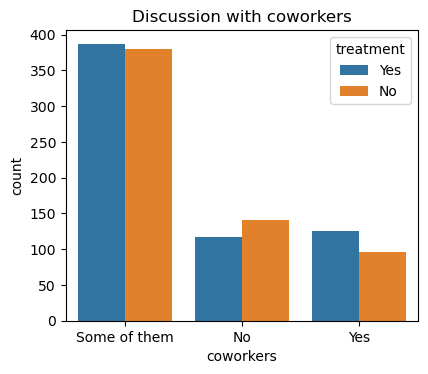

In [39]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 14)
sb.countplot(x='coworkers', hue='treatment', data=data)
plt.title('Discussion with coworkers')
plt.show()

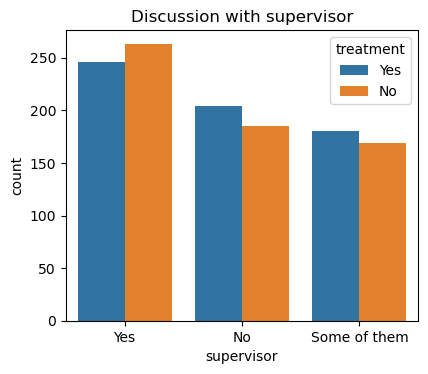

In [40]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 15)
sb.countplot(x='supervisor', hue='treatment', data=data)
plt.title('Discussion with supervisor')
plt.show()

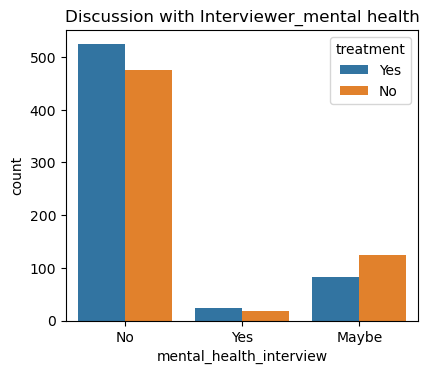

In [41]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 16)
sb.countplot(x='mental_health_interview', hue='treatment', data=data)
plt.title('Discussion with Interviewer_mental health')
plt.show()

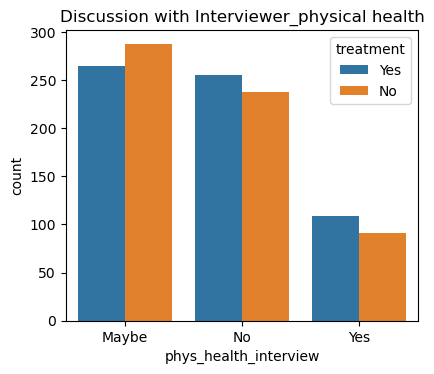

In [42]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 17)
sb.countplot(x='phys_health_interview', hue='treatment', data=data)
plt.title('Discussion with Interviewer_physical health')
plt.show()

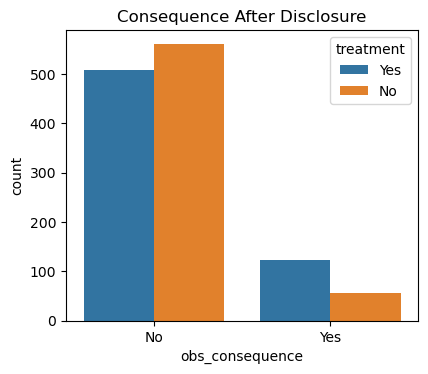

In [43]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 18)
sb.countplot(x='obs_consequence', hue='treatment', data=data)
plt.title('Consequence After Disclosure')
plt.show()

In [46]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,985,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
modified_data=data.copy()

In [48]:
modified_data.to_csv('modified_survey_data.csv',index=False)